# Iris Data Set Analysis
This notebook contains solutions to the jupyter, pyplot and numpy [problem sheet](https://emerging-technologies.github.io/problems/jupyter.html). This problem sheet uses the famous iris data set. This data set contains data regarding three related species, or classes, of Iris flowers. There are 50 samples per class making a total of 150 samples. Each sample consists of five variables, they are the sepal length in cm, sepal width in cm, petal length in cm, petal width in cm and and the class, in that order. The three classes are Iris Setosa, Iris Versicolour and Iris Virginica. The full desciption of the data set can be found [here](https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.names). Before starting, import any libraries that might be required.

In [1]:
# numpy efficiently deals with numerical multi-dimensional arrays.
import numpy as np

# matplotlib is a plotting library, and pyplot is its easy-to-use module.
import matplotlib.pyplot as plt

# seaborn is used to plot data.
import seaborn as sns

# This just sets the default plot size to be bigger.
plt.rcParams['figure.figsize'] = (16.0, 8.0)

### Load the data
The first step is to load the iris data set from the data folder.

In [2]:
# First read in the numbers and transpose the data
data = np.genfromtxt('data/iris.csv', delimiter=',', dtype=np.float, usecols=(0, 1, 2, 3))
sl, sw, pl, pw = data.transpose()

# Then read in the labels
labels = np.genfromtxt('data/iris.csv', delimiter=',', dtype=np.str, usecols=(4))

# Output the data
sl, sw, pl, pw, labels

(array([ 5.1,  4.9,  4.7,  4.6,  5. ,  5.4,  4.6,  5. ,  4.4,  4.9,  5.4,
         4.8,  4.8,  4.3,  5.8,  5.7,  5.4,  5.1,  5.7,  5.1,  5.4,  5.1,
         4.6,  5.1,  4.8,  5. ,  5. ,  5.2,  5.2,  4.7,  4.8,  5.4,  5.2,
         5.5,  4.9,  5. ,  5.5,  4.9,  4.4,  5.1,  5. ,  4.5,  4.4,  5. ,
         5.1,  4.8,  5.1,  4.6,  5.3,  5. ,  7. ,  6.4,  6.9,  5.5,  6.5,
         5.7,  6.3,  4.9,  6.6,  5.2,  5. ,  5.9,  6. ,  6.1,  5.6,  6.7,
         5.6,  5.8,  6.2,  5.6,  5.9,  6.1,  6.3,  6.1,  6.4,  6.6,  6.8,
         6.7,  6. ,  5.7,  5.5,  5.5,  5.8,  6. ,  5.4,  6. ,  6.7,  6.3,
         5.6,  5.5,  5.5,  6.1,  5.8,  5. ,  5.6,  5.7,  5.7,  6.2,  5.1,
         5.7,  6.3,  5.8,  7.1,  6.3,  6.5,  7.6,  4.9,  7.3,  6.7,  7.2,
         6.5,  6.4,  6.8,  5.7,  5.8,  6.4,  6.5,  7.7,  7.7,  6. ,  6.9,
         5.6,  7.7,  6.3,  6.7,  7.2,  6.2,  6.1,  6.4,  7.2,  7.4,  7.9,
         6.4,  6.3,  6.1,  7.7,  6.3,  6.4,  6. ,  6.9,  6.7,  6.9,  5.8,
         6.8,  6.7,  6.7,  6.3,  6.5, 

### Plot sepal length and width
Use pyplot to create a scatter plot of sepal length on the x-axis versus sepal width on the y-axis. Add axis labels and a title to the plot.

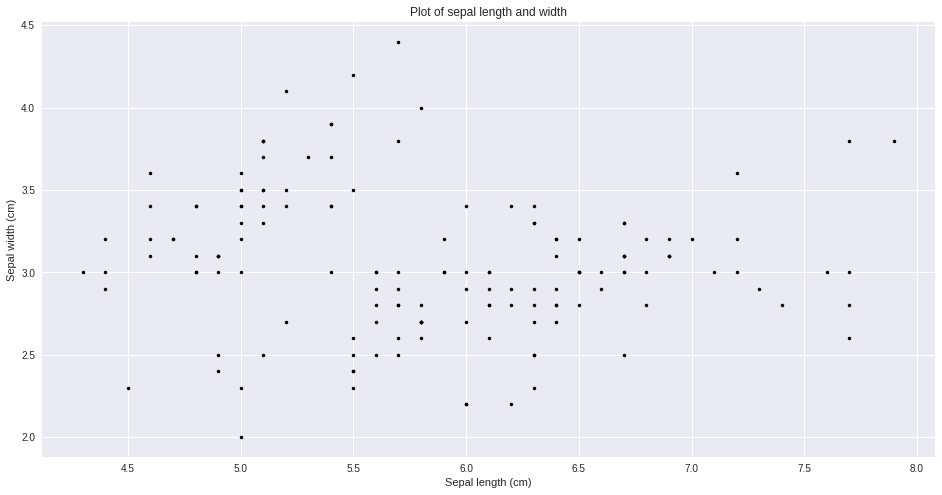

In [3]:
plt.plot(sl, sw, 'k.')
plt.xlabel('Sepal length (cm)')
plt.ylabel('Sepal width (cm)')
plt.title('Plot of sepal length and width')
plt.show()

### Plot sepal length and width in colour
Re-create the above plot, but this time plot the setosa data points in red, the versicolor data point in green, and the virginica data points in blue. Setosa, versicolor, and virginica are the three possible values of the species variable. Add a legend to the plot showing which species is in which colour.

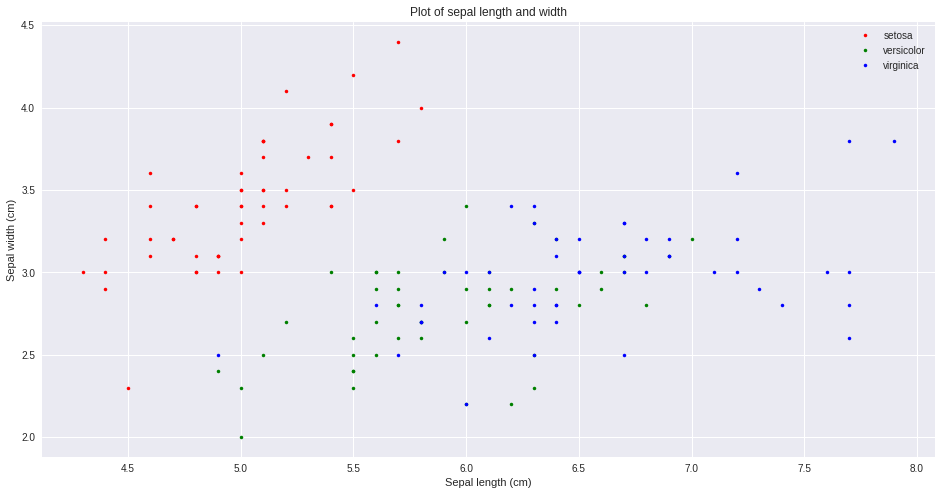

In [4]:
# Adapted from https://gist.github.com/jobliz/2903500
setosa_sl = []
setosa_sw = []
versicolor_sl = [] 
versicolor_sw = []
virginica_sl = []
virginica_sw = []

for i, label in enumerate(labels):
    if label == 'Iris-setosa':
        setosa_sl.append(sl[i])
        setosa_sw.append(sw[i])
    elif label == 'Iris-versicolor':
        versicolor_sl.append(sl[i])
        versicolor_sw.append(sw[i])
    elif label == 'Iris-virginica':
        virginica_sl.append(sl[i])
        virginica_sw.append(sw[i])

# Plot the data
plt.plot(setosa_sl, setosa_sw, 'r.', label='setosa')
plt.plot(versicolor_sl, versicolor_sw, 'g.', label='versicolor')
plt.plot(virginica_sl, virginica_sw, 'b.', label='virginica')
plt.xlabel('Sepal length (cm)')
plt.ylabel('Sepal width (cm)')
plt.title('Plot of sepal length and width')
plt.legend()
plt.show()

### Using Seaborn
Use the [seaborn](http://seaborn.pydata.org/examples/scatterplot_matrix.html) library to create a scatterplot matrix of all five variables.

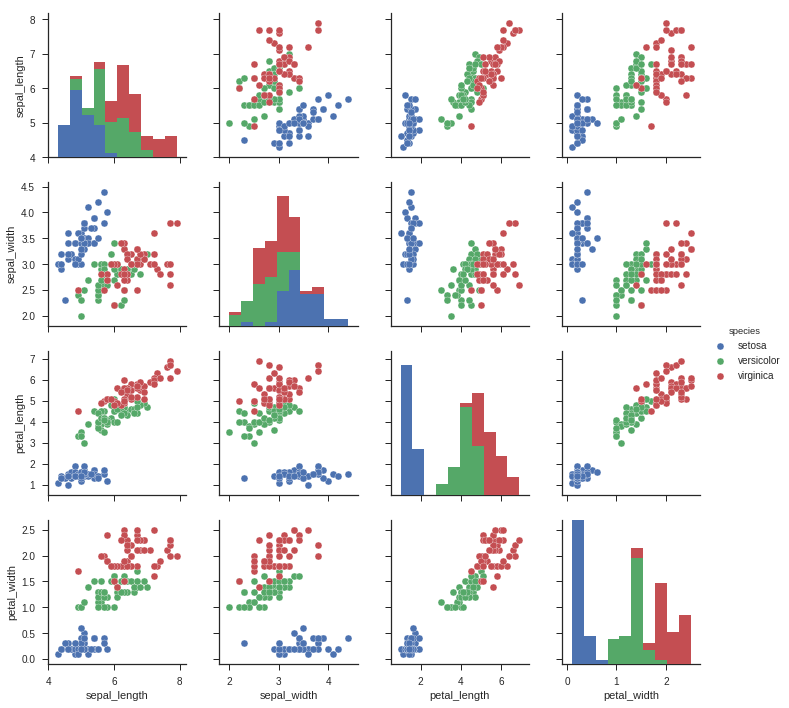

In [5]:
# Adapted from http://seaborn.pydata.org/examples/scatterplot_matrix.html
sns.set(style='ticks')
iris = sns.load_dataset('iris')
sns.pairplot(iris, hue='species')
plt.show()

### Fit a line
Fit a straight line to the variables petal length and petal width for the whole data set. Plot the data points in a scatter plot with the best fit line shown.

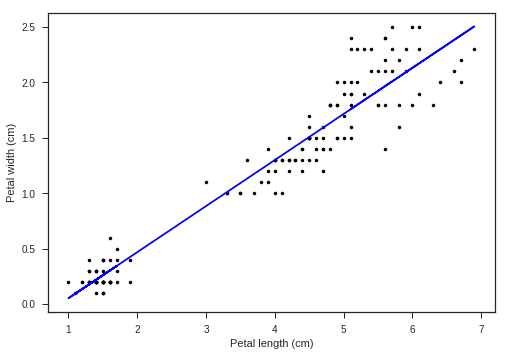

In [6]:
# Fit the line
m, c = np.polyfit(pl, pw, 1)

# Plot the line
plt.plot(pl, pw, 'k.')
plt.plot(pl, m * pl + c, 'b-')
plt.xlabel('Petal length (cm)')
plt.ylabel('Petal width (cm)')
plt.show()

### Calculate the R-squared value for the line above
The purpose of the R-squared value, also known as the *coefficient of determination*, is to measure how much of the variance in $y$ is determined by $x$. In this example, $y$ is the petal width and $x$ is the petal length. The following is the R-squared calculation in pure Python.

```
rsq = 1.0 - (np.sum((pw - m * pl - c)**2) / np.sum((pw - np.mean(pw))**2))
```

However, numpy provides a function to calculate this value for us.

In [7]:
# Calculate the R-squared value for the data set using numpy.
np.corrcoef(pw, pl)[0][1]**2

0.92697588958242438

### Fit another line
Use numpy to select only the data points where species is setosa. Fit a straight line to the variables petal length and petal width. Plot the data points in a scatter plot with the best fit line shown.

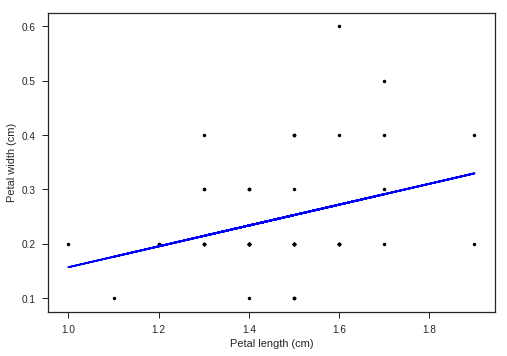

In [8]:
x = np.arange(len(labels))
setosa_pl = np.trim_zeros(np.select([labels[x] == 'Iris-setosa'], [pl[x]]))
setosa_pw = np.trim_zeros(np.select([labels[x] == 'Iris-setosa'], [pw[x]]))

# Fit the line
m, c = np.polyfit(setosa_pl, setosa_pw, 1)

# Plot the line
plt.plot(setosa_pl, setosa_pw, 'k.')
plt.plot(setosa_pl, m * setosa_pl + c, 'b-')
plt.xlabel('Petal length (cm)')
plt.ylabel('Petal width (cm)')
plt.show()

### Calculate the R-squared value
Calculate the R-squared value for the line above.

In [10]:
# Calculate the R-squared value for the data set using numpy.
np.corrcoef(setosa_pw, setosa_pl)[0][1]**2

0.099620649547465911